In [2]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml("mnist_784",version=1)
# mnist.keys()
# dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
X, y = mnist["data"], mnist["target"]
# print(X.shape)
# print(y.shape)
# (70000, 784)
# (70000,)

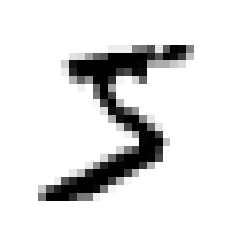

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# some_digit= X[0]
some_digit=np.array(X.iloc[0])#encode
some_digit_image=some_digit.reshape(28,28)#decode

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
y[0]
y=y.astype(np.uint8)
#split train and test data 6000 train and 1000 test
X_train,X_test,y_train,y_test=X[:6000],X[6000:],y[:6000],y[6000:]

#membuat model untuk mengenali sebuah nilai 5 atau -5
y_train_5=(y_train==5)
y_test_5=(y_test==5)
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
predict=sgd_clf.predict([some_digit])
predict



c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [5]:
# some_digit (gambar di representasikan di setiap row dlm satu instance,1 feature berisikan 1pcl yg mana terdapat 28x28 pcl 0-255 data)


In [6]:
#validation use cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_test,y_test_5,cv=3,scoring="accuracy").mean()
# array([0.96601669, 0.96128065, 0.96418694])
# 0.9615
# 0.9638280908031848

0.9638280908031848

In [7]:
# Confusion matriks

# make predicitions from cros val predict
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
print(y_train_predict)
#confusion matriks
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_train_5,y_train_predict)
conf_matrix

[False False False ... False False False]


array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [8]:
#TN FP
#FN TP

#make precision and recal
#precision => actually ACURACY dari TP ke FP dalam memprediksi keakuratan object prediction
from sklearn.metrics import precision_score, recall_score
precesion=precision_score(y_train_5,y_train_predict)
#recal =>actually acuracy dari tp ke FN dalam memprediksi model prediction yang tidak terbaca TP
recal=recall_score(y_train_5,y_train_predict)
print(precesion)
print(recal)


0.7801980198019802
0.7665369649805448


dari hasil dapat dinyatakan bahwa prediksi clasification cenderung ke precesion yang mana seringkali model salah memprediksi object prediksi dengan non prediksi, bukannya salah dalam membedakan object prediction lainnya pada recal

In [9]:
#f1 score=precision and recal
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7733071638861628

Pada clasifier ada precision and recal, yang mana keduanya saling berkaitan terhadap tebakan model, jika precision sangat tinggi maka keakuratan model dalam object predictions sangat tinggi namum recalnya rendah yang menyebabkan sensitivitas model dalam membaca object prediction lain menjadi berkurang sehingga true positif menjadi sedikit dan false negatif akan semakin banyak

jika precision rendah dan recal tinggi maka banyak ada dakwaan terhadap object prediction sehingga model menjadi sangat sensitive yang menyebabkan keakurtan model dalam memprediksi object prediction menjadi berkurang dan bisa menyebabkan object yang menyerupai object prediction bisa di includekan dalam true positif sehingga menyebabkan true positif akan semakin tinggi namun false negatif akan semakin rendah bahkan true negatif bisa menjadi beberapa yang menyerupai include ke dalam true positif.

Namun recal dan precision pada f1 score ada kelemahan, yg di jawab pada precision/recal trade of

ingat solusi 
just  tingkatkan therehold maka menyebabkan precision naik tapi precision yang meningkat tidak akan berarti jika recalnya sedikit.

In [10]:
#set up thereshold
y_score=sgd_clf.decision_function([some_digit])
# y_score
thereshold=0
y_some_digit_predict=(y_score > thereshold)
# y_some_digit_predict#true
thereshold=40000
y_some_digit_predict=(y_score > thereshold)
y_some_digit_predict


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [11]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                           method="decision_function")#decision tree can set automaticly therholds
# array([38042.34312442])
#use the precision_recall_curve() function to compute precision
# and recall for all possible thresholds:
from sklearn.metrics import precision_recall_curve
precesions,recalls,theresholds= precision_recall_curve(y_train_5,y_scores)
# print(precesions)
# print(recalls)
# print(theresholds)
# [0.09943896 0.09926471 0.09928392 ... 1.         1.         1.        ]
# [1.         0.99805447 0.99805447 ... 0.00389105 0.00194553 0.        ]
# [-794281.25464331 -794223.78112917 -793338.36872556 ...  830440.47034494
#   850868.83207321  852681.43917402]



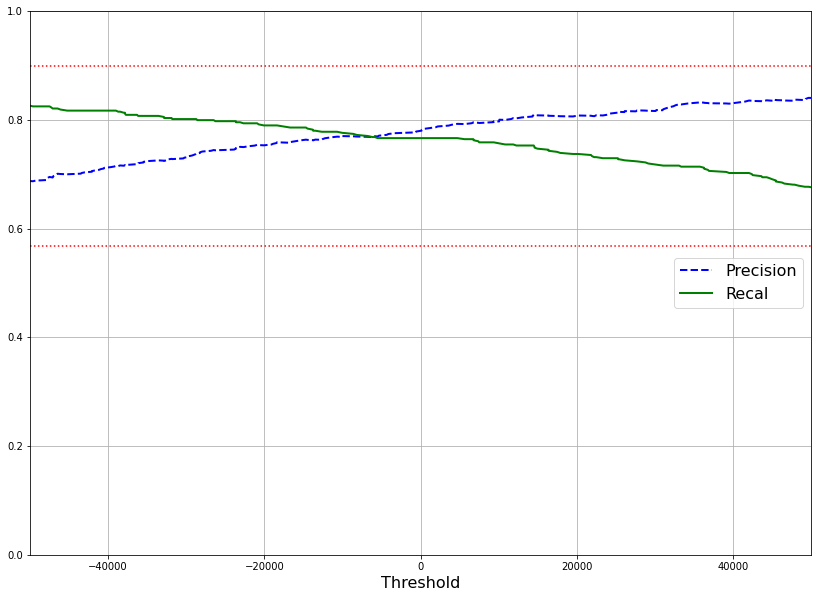

In [12]:
# visualisasi plot precision dan recall sebagai function dari thereshold
def plot_precision_recall_vs_thereshold(precesions,recalls,theresholds):
    plt.plot(theresholds,precesions[:-1],"b--",label="Precision",linewidth=2)
    plt.plot(theresholds,recalls[:-1],"g-",label="Recal",linewidth=2)
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel("Threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
    # plt.grid(b=True,which="both",axis="both",color="gray",linestyle="-",linewidth=1)
recall_90_precision = recalls[np.argmax(precesions >= 0.90)]
threshold_90_precision = theresholds[np.argmax(precesions >= 0.90)]
plt.figure(figsize=(14,10))
plot_precision_recall_vs_thereshold(precesions,recalls,theresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
# save_fig("precision_recall_vs_threshold_plot") 
plt.show()

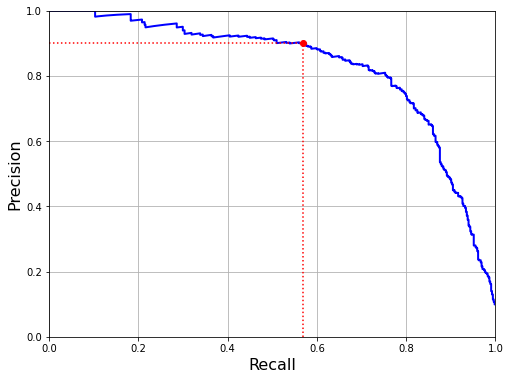

In [13]:
def plot_precision_vs_recall(precesions,recalls):
    plt.plot(recalls,precesions,"b-",linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precision",fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precesions,recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

In [14]:
#make predictions yang thereshold diatas 90%(true positif value)
y_train_pred_90=(y_scores>threshold_90_precision)
print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))


0.9009287925696594
0.566147859922179


In [15]:
import pandas as pd
data=pd.DataFrame([[1,2,3],[4,5,6]])
data.iloc[0,2]

3

Roc tidak seperti precision dan recal tapi mirip. digunakan untuk mengetahui rating dari TPR (recal/banyak object predictions pada true positive ) dan FPR(false positive rate->kegagalann dlm memprediksi ke akuratan model terhadap object prediksi) 

In [16]:
#ROC
from sklearn.metrics import roc_curve
fpr,tpr,theresholds_roc=roc_curve(y_train_5,y_scores)
print(fpr)
print(tpr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82282173e-04
 1.82282173e-04 5.46846518e-04 5.46846518e-04 7.29128691e-04
 7.29128691e-04 9.11410864e-04 9.11410864e-04 1.09369304e-03
 1.09369304e-03 1.45825738e-03 1.45825738e-03 1.82282173e-03
 1.82282173e-03 2.18738607e-03 2.18738607e-03 2.36966825e-03
 2.36966825e-03 2.55195042e-03 2.55195042e-03 2.73423259e-03
 2.73423259e-03 2.91651476e-03 2.91651476e-03 3.09879694e-03
 3.09879694e-03 3.28107911e-03 3.28107911e-03 3.46336128e-03
 3.46336128e-03 3.64564346e-03 3.64564346e-03 3.82792563e-03
 3.82792563e-03 4.01020780e-03 4.01020780e-03 4.19248997e-03
 4.19248997e-03 4.37477215e-03 4.37477215e-03 4.55705432e-03
 4.55705432e-03 4.73933649e-03 4.73933649e-03 5.28618301e-03
 5.28618301e-03 5.46846518e-03 5.46846518e-03 5.65074736e-03
 5.65074736e-03 5.83302953e-03 5.83302953e-03 6.01531170e-03
 6.01531170e-03 6.56215822e-03 6.56215822e-03 6.74444039e-03
 6.74444039e-03 6.92672257e-03 6.92672257e-03 7.29128691e-03
 7.29128691e-03 7.473569

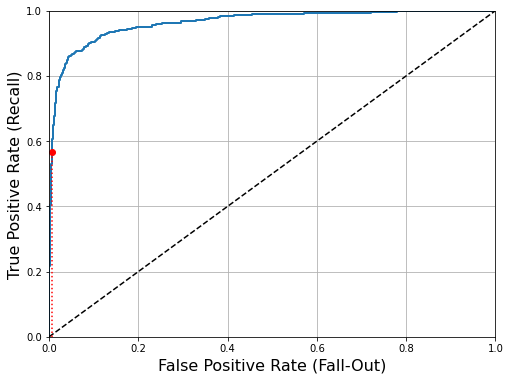

In [17]:
#visualisasi  roc curve
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")#dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()

maka semakin besar object prediksi yang dikenali sebagai objectprediksi oleh model atau semakin banyak object prediksi pada true positive maka semakin besar juga false positive ratenya, atau  semakin kecil kemampuan model dalam keakuratannya memprediksi object prediksi.

salah satu untuk membandingkan sebuah clasifikasi adalah dengan menghitung AUC(area under the curve), perfect clasifier adalah jika score pada ROC-AUC sama dengan 1 atau mendekati satu, 

In [18]:
#compute score ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC_Score=roc_auc_score(y_train_5,y_scores)
print(ROC_AUC_Score)
# 0.9641599203348885 -> MENDEKATI 1 yang mana klasifikasi sangat baik

0.9641599203348885


In [19]:
#using binary classification for multclass classification=>sklearn automatic detec 
# automatic run dengan ovr or ovo
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto",random_state=42)
svm_clf.fit(X_train,y_train)#train_y not train y_train_5
svm_clf_pred=svm_clf.predict([some_digit])
print(svm_clf_pred)


[5]


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
# used decision_function() for get score dari setiap train dan 
# select yg mana sering menang duel
some_digit_scores=svm_clf.decision_function([some_digit])
print(some_digit_scores) 

[[ 1.8249344   8.01830986  0.81268669  4.8465137   5.87200033  9.29462954
   3.8465137   6.94086295 -0.21310287  2.83645231]]


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [21]:
#highest score is inded the one coresponding to class 5
np.argmax(some_digit_scores)
# => 5
svm_clf.classes_
# => array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
#score duel, dengan class 5 terbesar=> 9.29462954
# [[ 1.8249344   8.01830986  0.81268669  4.8465137   5.87200033  9.29462954
#    3.8465137   6.94086295 -0.21310287  2.83645231]]
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [41]:
#force sklearn to use ovr or ovo
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])
print(ovr_clf.predict([some_digit]))
len(ovr_clf.estimators_)
ovr_clf.classes_
print(ovr_clf.decision_function([some_digit]))
# [[-1.84965477 -2.0204178  -1.35017272 -0.89327793 -3.08512613  0.99953535
#   -1.75835738 -1.31664691 -2.10870854 -1.95794039]] =>hasilnya terlalu buruk
# dikarenakan ovr terlalu banyak proses duel.


[5]
[[-1.84965477 -2.0204178  -1.35017272 -0.89327793 -3.08512613  0.99953535
  -1.75835738 -1.31664691 -2.10870854 -1.95794039]]


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-p

In [23]:
# training multiclass algo
from sklearn.ensemble import RandomForestClassifier
r_clf= RandomForestClassifier(random_state=42,n_estimators=10,n_jobs=5)
r_clf.fit(X_train,y_train)
r_clf.predict([some_digit])

c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [24]:
# make duel untuk beberapa class, jika ensamble learning maka menggunakan sebuah
# decision path bukan decision function
r_clf_scores=r_clf.decision_path([some_digit])
# 100 estimator
# array([     0,   1649,   3130,   4631,   6222,   7729,   9332,  10823,
#          12352,  13917,  15396,  16911,  18492,  19993,  21450,  22995,
#          24426,  25975,  27502,  29061,  30656,  32225,  33712,  35319,
#          36848,  38377,  39842,  41353,  42924,  44435,  46010,  47493,
#          49120,  50637,  52186,  53733,  55316,  56887,  58448,  60013,
#          61488,  62991,  64458,  65915,  67422,  68875,  70348,  71901,
#          73386,  74873,  76386,  77951,  79512,  80993,  82474,  83997,
#          85558,  87011,  88562,  90071,  91636,  93223,  94772,  96279,
#          97748,  99315, 100812, 102409, 103910, 105373, 106934, 108517,
#         109960, 111453, 112956, 114469, 115976, 117479, 118968, 120501,
#         122012, 123473, 125006, 126503, 128092, 129613, 131106, 132621,
#         134150, 135631, 137152, 138719, 140222, 141745, 143272, 144847,
#         146410, 147905, 149468, 151063, 152616]))
#10 estimator
r_clf_scores

c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(<1x15396 sparse matrix of type '<class 'numpy.int64'>'
 	with 115 stored elements in Compressed Sparse Row format>,
 array([    0,  1649,  3130,  4631,  6222,  7729,  9332, 10823, 12352,
        13917, 15396]))

In [25]:
# use multiclass classifier use from sgd classifier
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])
sgd_clf.decision_function([some_digit])
# array([[-735711.69660953, -857058.38635209, -281086.00104909,
#            8289.73273042, -616793.26669143,   29040.2961313 ,
#         -492305.02284074, -834395.17091855, -318385.3774766 ,
#         -363474.38706356]])


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-735711.69660953, -857058.38635209, -281086.00104909,
           8289.73273042, -616793.26669143,   29040.2961313 ,
        -492305.02284074, -834395.17091855, -318385.3774766 ,
        -363474.38706356]])

In [26]:
# ada keraguan pada class 3 karena semua hasil pada duel adalah minus
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
# y_train_scaled=scaler.fit_transform(y_train.astype(np.float64)-> minimal scaling lebih dari dua field lah, ini kan satu wkwkw apa yang mau di scaling
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")
# array([0.8705, 0.8985, 0.8925])

array([0.8705, 0.8985, 0.8925])

In [27]:
y_train_pred_error_analy=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
y_train_pred_error_analy
conf_mx=confusion_matrix(y_train,y_train_pred_error_analy)
print(conf_matrix)

[[5375  111]
 [ 120  394]]


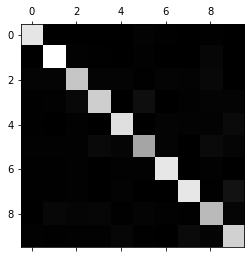

In [28]:
#visualisati
# print(y_train_pred_error_analy)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

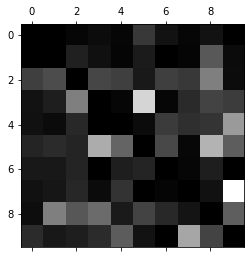

In [29]:
#error analisis
# bagi value pada conf matriks sesuai jumlah value dari gambar
row_sums=conf_mx.sum(axis=1,keepdims=True)
# row_sums
# array([[592],
#        [671],
#        [581],
#        [608],
#        [623],
#        [514],
#        [608],
#        [651],
#        [551],
#        [601]], dtype=int64)
# jadi setiap value pada class clasifier di jumlahkan

norm_conf_mx=conf_mx/row_sums
# norm_conf_mx
# array([[0.96621622, 0.        , 0.00168919, 0.00337838, 0.00168919,
#         0.0152027 , 0.00506757, 0.00168919, 0.00506757, 0.        ],
#        [0.        , 0.94932936, 0.00894188, 0.00447094, 0.00149031,
#         0.00745156, 0.        , 0.00149031, 0.02384501, 0.00298063],
#        [0.0172117 , 0.02065404, 0.84853701, 0.01893287, 0.0172117 ,
#         0.00688468, 0.0172117 , 0.01549053, 0.03442341, 0.00344234],
#        [0.00493421, 0.00822368, 0.03453947, 0.84539474, 0.00164474,
#         0.05756579, 0.00164474, 0.01151316, 0.01809211, 0.01644737],
#        [0.00481541, 0.00321027, 0.01123596, 0.        , 0.89245586,
#         0.00321027, 0.01605136, 0.01284109, 0.01444623, 0.04173355],
#        [0.00972763, 0.01167315, 0.00972763, 0.04669261, 0.02723735,
#         0.79961089, 0.01945525, 0.00194553, 0.04863813, 0.02529183],
#        [0.00657895, 0.00657895, 0.00986842, 0.        , 0.00822368,
#         0.00986842, 0.94901316, 0.00164474, 0.00822368, 0.        ],
#        [0.00460829, 0.00614439, 0.01075269, 0.0030722 , 0.01382488,
#         0.        , 0.0015361 , 0.88632873, 0.00460829, 0.06912442],
#        [0.00362976, 0.03448276, 0.02359347, 0.02903811, 0.00725953,
#         0.01814882, 0.01088929, 0.00544465, 0.84210526, 0.02540835],
#        [0.01164725, 0.00665557, 0.00831947, 0.01164725, 0.0249584 ,
#         0.00499168, 0.        , 0.04492512, 0.01830283, 0.86855241]])
#fill diagonal dengan eror dengan keep only eror di plot
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [30]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [31]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

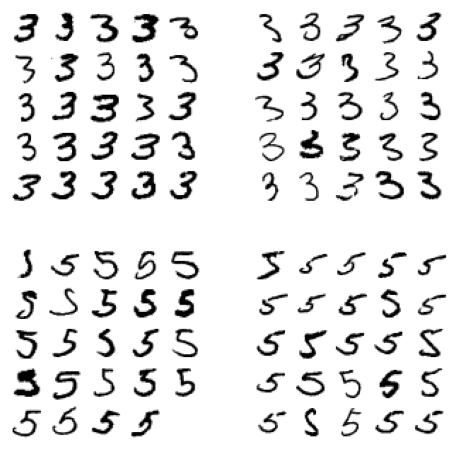

In [32]:
cl_a,cl_b=3,5
X_aa =X_train[(y_train == cl_a) & (y_train_pred_error_analy==cl_a)]
X_ab =X_train[(y_train == cl_a) & (y_train_pred_error_analy==cl_b)]
X_ba =X_train[(y_train == cl_b) & (y_train_pred_error_analy==cl_a)]
X_bb =X_train[(y_train == cl_b) & (y_train_pred_error_analy==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()



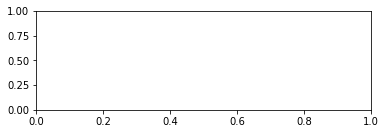

In [33]:
plt.subplot(211)
plt.show()

In [40]:
#multilabel classification system
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]#similary meaning np.np.concatenate
print(y_train_large)
print(y_train_odd)
print(y_multilabel)# ada dua label (large and odd)

0       False
1       False
2       False
3       False
4        True
        ...  
5995     True
5996    False
5997     True
5998    False
5999     True
Name: class, Length: 6000, dtype: bool
0        True
1       False
2       False
3        True
4        True
        ...  
5995     True
5996    False
5997    False
5998    False
5999     True
Name: class, Length: 6000, dtype: bool
[[False  True]
 [False False]
 [False False]
 ...
 [ True False]
 [False False]
 [ True  True]]


In [80]:
knn_clf=KNeighborsClassifier()
some_digit_2=np.array(X.iloc[-1])
knn_clf.fit(X_train,y_multilabel)
print(knn_clf.predict([some_digit_2]))
print(knn_clf.predict([some_digit]))
# array([[False,  True]])
# di liat pada hasil bahwa some_digit adalah 5=>false large, True odd, 


[[False False]]
[[False  True]]


c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [79]:
# np.array(X.iloc[1])
sgd_clf.predict([some_digit_2])

c:\Users\User\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([6], dtype=uint8)